In [1]:
#Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal

def GetHypo0():
    mean = (1, 1)
    cov = [[2, 0.8], [0.8, 1.0]]
    return mean, cov

def GetHypo1():
    mean = (0, -1)
    cov = [[2, 1.0], [1.0, 1.5]]
    return mean, cov

def GetRandomData(nSamp):
    #Create dummy data set 1
    mean, cov = GetHypo0()
    dat1 = np.random.multivariate_normal(mean, cov, nSamp)
    
    #Create dummy data set 2
    mean, cov = GetHypo1()
    dat2 = np.random.multivariate_normal(mean, cov, nSamp)

    return dat1, dat2

def GetHypoPDF(mean, cov):
    x, y = np.mgrid[-6:6:.01, -6:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)
    print(z.shape)
    return z

def EvaluatePDF1(Data):
    mean, cov = GetHypo1()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def EvaluatePDF0(Data):
    mean, cov = GetHypo0()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def PlotRandomData(dat1, dat2):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(dat1[:,0], dat1[:,1], s=10, c='b', marker="s", label='Hypothesis 0', alpha=0.01)
    ax1.scatter(dat2[:,0], dat2[:,1], s=10, c='r', marker="o", label='Hypothesis 1', alpha=0.015)
    plt.legend(loc='upper left');
    plt.show()  

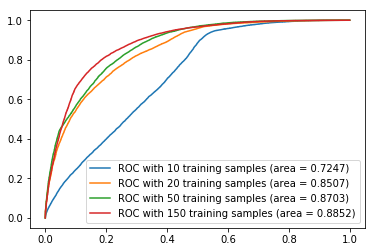

In [2]:
#Create sum KDEs
from sklearn.neighbors.kde import KernelDensity
nums = [10, 20, 50, 150]
D0test, D1test = GetRandomData(20000)

for num in nums:
    D0, D1= GetRandomData(num)
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.4).fit(D0)
    kde1 = KernelDensity(kernel='gaussian', bandwidth=0.4).fit(D1)

    lrhypo1 = kde0.score_samples(D1test) - kde1.score_samples(D1test)
    lrhypo0 = kde0.score_samples(D0test) - kde1.score_samples(D0test)
    zeroarry = np.ones(lrhypo1.shape)
    onearry = np.zeros(lrhypo0.shape)

    fpr, tpr, _ = roc_curve(np.concatenate((zeroarry, onearry)), np.concatenate((lrhypo0, lrhypo1)))
    roc_auc= auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC with '+ str(num) + ' training samples (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()